In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings("ignore")

from pydataset import data

import env
import wrangle

wrangle.py functions loaded successfully.


# Acquire the Data

### 1. Load the tips dataset. 

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [5]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [7]:
df.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
50.81       10.00  Male    Yes     Sat   Dinner  3       1
14.52       2.00   Female  No      Thur  Lunch   2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
15.53       3.00   Male    Yes     Sat   Dinner  2       1
                                                        ..
20.76       2.24   Male    No      Sun   Dinner  2       1
20.69       5.00   Male    No      Sun   Dinner  5       1
            2.45   Female  No      Sat   Dinner  4       1
20.65       3.35   Male    No      Sat   Dinner  3       1
3.07        1.00   Female  Yes     Sat   Dinner  1       1
Length: 243, dtype: int64

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

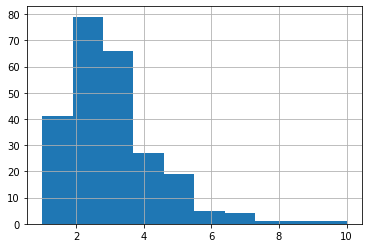

In [9]:
df.tip.hist()

<AxesSubplot:>

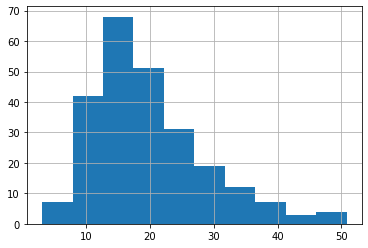

In [10]:
df.total_bill.hist()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

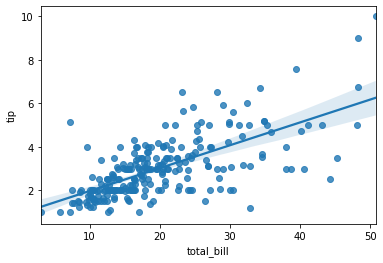

In [11]:
sns.regplot(y='tip', x = 'total_bill', data = df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

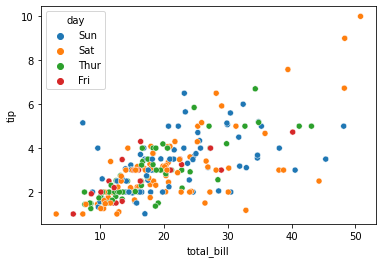

In [12]:
sns.scatterplot(y = 'tip', x = 'total_bill', data = df, hue = 'day')

# Prep the Data

- 1a. Create a column named `tip_percentage`. This should be the tip amount divided by the total bill.
- 1b. Create a column named `price_per_person`. This should be the total bill divided by the party size.

In [13]:
df['tip_percentage'] = (df.tip / df.total_bill)

In [14]:
df['price_per_person'] = (df.total_bill / df.size)
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.008704
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,0.005297
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.010763
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.012131
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.012597
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,0.014872
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,0.013924
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,0.011614
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,0.009129


Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

I think `total_bill` as a continuous variable would have an impact on tips, as well as party size, time, and obviously, `tip_percentage` being the most prominent. However, I think using `tip_percentage` as an independent variable is possible a bad idea, since it is derived from the target variable.

In [15]:
df.dtypes

total_bill          float64
tip                 float64
sex                  object
smoker               object
day                  object
time                 object
size                  int64
tip_percentage      float64
price_per_person    float64
dtype: object

In [16]:
# Creating dummy variables of the object columns.

mask = np.array(df.dtypes == "object")
mask

array([False, False,  True,  True,  True,  True, False, False, False])

In [17]:
obj_df = df.iloc[:, mask]
obj_df.columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [18]:
# Create a new dummy dataframe:

dummy_df = pd.get_dummies(obj_df, dummy_na = False, drop_first = True)
dummy_df

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,0,0,1,0,0
...,...,...,...,...,...,...
240,1,0,1,0,0,0
241,0,1,1,0,0,0
242,1,1,1,0,0,0
243,1,0,1,0,0,0


In [19]:
df = pd.concat([df, dummy_df], axis = 1)
df.drop(columns = obj_df.columns, inplace = True)
df.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,2,0.059447,0.008704,0,0,0,1,0,0
2,10.34,1.66,3,0.160542,0.005297,1,0,0,1,0,0
3,21.01,3.50,3,0.166587,0.010763,1,0,0,1,0,0
4,23.68,3.31,2,0.139780,0.012131,1,0,0,1,0,0
5,24.59,3.61,4,0.146808,0.012597,0,0,0,1,0,0


In [20]:
# Making the columns indexes more pythonese (all lower case).

df.columns = map(str.lower, df.columns)
df.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch
1,16.99,1.01,2,0.059447,0.008704,0,0,0,1,0,0
2,10.34,1.66,3,0.160542,0.005297,1,0,0,1,0,0
3,21.01,3.50,3,0.166587,0.010763,1,0,0,1,0,0
4,23.68,3.31,2,0.139780,0.012131,1,0,0,1,0,0
5,24.59,3.61,4,0.146808,0.012597,0,0,0,1,0,0


In [21]:
def split_data(df):
    from sklearn.model_selection import train_test_split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

In [22]:
train, validate, test = split_data(df)

In [23]:
train.shape, validate.shape, test.shape

((136, 11), (59, 11), (49, 11))

In [24]:
if train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]:
    print("The shapes match; your split datasets are good to go!")
else:
    print("The shapes do not match, there is a problem with your split.")

The shapes match; your split datasets are good to go!


### **1d:** Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

### KBest
- Split into X and y dataframes
- y == `tip` (target variable)

In [25]:
# x df's are all cols except tip
X_train = train.drop(columns=['tip', 'tip_percentage'])
X_validate = validate.drop(columns=['tip', 'tip_percentage'])
X_test = test.drop(columns=['tip', 'tip_percentage'])

# y df's are just tip, the dependent variable
y_train = train[['tip']]
y_validate = validate[['tip']]
y_test = test[['tip']]

In [26]:
# I need to scale the train data before I split it up into X and y. Since I have dummy columns that are 0s and 1s, probably should use the MinMaxScaler

In [27]:
X_train.columns

Index(['total_bill', 'size', 'price_per_person', 'sex_male', 'smoker_yes',
       'day_sat', 'day_sun', 'day_thur', 'time_lunch'],
      dtype='object')

In [28]:
scaler = MinMaxScaler(copy = True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Now creating a dataframe using the above numpy arrays:


X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

In [31]:
f_selector = SelectKBest(f_regression, k=2)

In [32]:
f_selector = f_selector.fit(X_train_scaled, y_train.tip)

In [33]:
X_train_reduced = f_selector.transform(X_train_scaled)

print(X_train.shape)
print(X_train_reduced.shape)

(136, 9)
(136, 2)


In [34]:
# Creating a boolean mask to 
f_support = f_selector.get_support()
print(type(f_support))
print(f_support)

<class 'numpy.ndarray'>
[ True False  True False False False False False False]


In [38]:
X_train_scaled.head()

,total_bill,size,price_per_person,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch
19,0.307114,0.4,0.307114,0.0,0.0,0.0,1.0,0.0,0.0
173,0.092355,0.2,0.092355,1.0,1.0,0.0,1.0,0.0,0.0
119,0.206805,0.2,0.206805,0.0,0.0,0.0,0.0,1.0,1.0
29,0.411622,0.2,0.411622,1.0,0.0,1.0,0.0,0.0,0.0
238,0.657534,0.2,0.657534,1.0,1.0,1.0,0.0,0.0,0.0


In [39]:
X_reduced_scaled.head()

,total_bill,price_per_person
19,0.307114,0.307114
173,0.092355,0.092355
119,0.206805,0.206805
29,0.411622,0.411622
238,0.657534,0.657534


In [35]:
X_reduced_scaled = X_train_scaled.iloc[:,f_support]
X_reduced_scaled.head()

,total_bill,price_per_person
19,0.307114,0.307114
173,0.092355,0.092355
119,0.206805,0.206805
29,0.411622,0.411622
238,0.657534,0.657534


In [36]:
f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()
f_feature

['total_bill', 'price_per_person']

The top two features as selected by the KBest algorithm and model were:
- `total_bill`
- `price_per_person`

Ending up with `total_bill` makes sense, as it would most likely have a bigger impact since higher meal bills typically yield a bigger tip.

### Recursive Feature Elimination: RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Assigning the model:

lm = LinearRegression()

In [ ]:
# Setting up the RFE, using 2

rfe = RFE(lm, 2)

In [ ]:
X_rfe = rfe.fit_transform(X_train_scaled, y_train.tip)

In [ ]:
mask_rfe = rfe.support_

In [ ]:
X_reduced_scaled_rfe = X_train_scaled.iloc[:, mask_rfe]

In [ ]:
# features selected using rfe:
X_reduced_scaled_rfe.columns.tolist()

The top two features as selected by the RFE algorithm and model were:
- `total_bill`
- `price_per_person`

So `total_bill` and `price_per_person` unsurprisingly show up again. 

### 1e. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?

### KBest
- Split into X and y dataframes
- y == `tip_percentage` (target variable)

In [41]:
# x df's are all cols except tip_percentage
X_train2 = train.drop(columns=['tip', 'tip_percentage'])
X_validate2 = validate.drop(columns=['tip', 'tip_percentage'])
X_test2 = test.drop(columns=['tip', 'tip_percentage'])

# y df's are just tip, the dependent variable
y_train2 = train[['tip_percentage']]
y_validate2 = validate[['tip_percentage']]
y_test2 = test[['tip_percentage']]

In [43]:
X_train2.columns

Index(['total_bill', 'size', 'price_per_person', 'sex_male', 'smoker_yes',
       'day_sat', 'day_sun', 'day_thur', 'time_lunch'],
      dtype='object')

In [45]:
scaler2 = MinMaxScaler(copy = True).fit(X_train2)

X_train_scaled2 = scaler.transform(X_train2)
X_validate_scaled2 = scaler.transform(X_validate2)
X_test_scaled2 = scaler.transform(X_test2)

In [46]:
# Now creating a dataframe using the above numpy arrays:


X_train_scaled2 = pd.DataFrame(X_train_scaled2, 
                              columns=X_train2.columns.values).\
                            set_index([X_train2.index.values])

X_validate_scaled2 = pd.DataFrame(X_validate_scaled2, 
                                columns=X_validate2.columns.values).\
                            set_index([X_validate2.index.values])

X_test_scaled2 = pd.DataFrame(X_test_scaled2, 
                                columns=X_test2.columns.values).\
                            set_index([X_test2.index.values])

In [47]:
from sklearn.feature_selection import SelectKBest, f_regression

In [48]:
f_selector2 = SelectKBest(f_regression, k=2)

In [50]:
f_selector2 = f_selector2.fit(X_train_scaled2, y_train2.tip_percentage)

In [51]:
X_train_reduced2 = f_selector.transform(X_train_scaled2)

print(X_train2.shape)
print(X_train_reduced2.shape)

(136, 9)
(136, 2)


In [53]:
# Creating a boolean mask to 
f_support2 = f_selector.get_support()
print(type(f_support2))
print(f_support2)

<class 'numpy.ndarray'>
[ True False  True False False False False False False]


In [54]:
X_train_scaled2.head()

,total_bill,size,price_per_person,sex_male,smoker_yes,day_sat,day_sun,day_thur,time_lunch
19,0.307114,0.4,0.307114,0.0,0.0,0.0,1.0,0.0,0.0
173,0.092355,0.2,0.092355,1.0,1.0,0.0,1.0,0.0,0.0
119,0.206805,0.2,0.206805,0.0,0.0,0.0,0.0,1.0,1.0
29,0.411622,0.2,0.411622,1.0,0.0,1.0,0.0,0.0,0.0
238,0.657534,0.2,0.657534,1.0,1.0,1.0,0.0,0.0,0.0


In [57]:
X_reduced_scaled2 = X_train_scaled2.iloc[:,f_support2]
X_reduced_scaled2.head()

,total_bill,price_per_person
19,0.307114,0.307114
173,0.092355,0.092355
119,0.206805,0.206805
29,0.411622,0.411622
238,0.657534,0.657534


In [58]:
f_feature2 = X_train_scaled2.iloc[:,f_support2].columns.tolist()
f_feature2

['total_bill', 'price_per_person']

### Recursive Feature Elimination: RFE

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Assigning the model:

lm = LinearRegression()

In [63]:
# Setting up the RFE, using 2

rfe = RFE(lm, 2)

In [64]:
X_rfe = rfe.fit_transform(X_train_scaled, y_train.tip)

In [65]:
mask_rfe = rfe.support_

In [66]:
X_reduced_scaled_rfe = X_train_scaled.iloc[:, mask_rfe]

In [140]:
X_reduced_scaled_rfe.head()

,total_bill,price_per_person
19,0.307114,0.307114
173,0.092355,0.092355
119,0.206805,0.206805
29,0.411622,0.411622
238,0.657534,0.657534


In [67]:
# features selected using rfe:
X_reduced_scaled_rfe.columns.tolist()

['total_bill', 'price_per_person']

We ended up getting the same results as above; `total_bill`, and `price_per_person` were the features that were returned.

In [149]:
def rfe_function(k, X_train_scaled, y_train):
    
    lm = LinearRegression()
    
    rfe = RFE(lm, k)
    
    X_rfe = rfe.fit_transform(X_train_scaled, y_train)
    
    mask_rfe = rfe.support_
    
    X_reduced_scaled_rfe = X_train_scaled.iloc[:, mask_rfe]
    
    # features selected using rfe:
    X_reduced_scaled_rfe.columns.tolist()
    
    rfe_features = X_reduced_scaled_rfe.columns.tolist()
    
    return rfe_features

## Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. 

- Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [76]:
def select_kbest(X_train, y_train, k_num):
    
    from sklearn.feature_selection import SelectKBest, f_regression
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.values).set_index([X_train.index.values])
    
    '''
    This function assumes that we have already scaled the X_train data.
    '''
        
    # Now, creating the KBest object:
    f_selector = SelectKBest(f_regression, k=k_num)
    
    # Fitting the object to our X and y train data.
    f_selector = f_selector.fit(X_train_scaled, y_train)
    
    # Transform our dataset to reduct to the K best features.
    X_train_reduced = f_selector.transform(X_train_scaled)
    
    # Creating the boolean mask that the function will use to isolate the top "k" features:
    f_support = f_selector.get_support()
    
    
    X_reduced_scaled = X_train_scaled.iloc[:,f_support]
    
    
    f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()
    return f_feature

In [81]:
select_kbest(X_train, y_train.tip, 2)

['total_bill', 'price_per_person']

The function returned the same features as the manual process. I restarted the kernal and did that.

## Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. 

- You should see the same results as when you did the process manually.

In [136]:
def rfe(X_train, y_train, k_num): 
    
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.values).set_index([X_train.index.values])
    
    lm = LinearRegression()
    rfe_obj = RFE(lm, k_num)
    X_rfe = rfe_obj.fit_transform(X_train_scaled, y_train)
    
    # creating the boolean mask that shows what the "best" features are, and eliminates the rest.
    mask = rfe_obj.support_
    
    # Creating the columns list:
    X_reduced_scaled = X_train_scaled.iloc[:,f_support]
    
    
    # This next step returns the features that the rfe 
    feature_list = X_reduced_scaled_rfe.columns.tolist()
    
    return feature_list

In [120]:
rfe(X_train, y_train, 2)

['total_bill', 'price_per_person']

The results appear to be the same: `total_bill` and `price_per_person`

# 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top *3* features using *both* select k best and recursive feature elimination 

- Use the functions you just built to help you out.

In [105]:
dfs = data('swiss')
dfs.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


## Using the KBest 

In [106]:
dfs.info?

In [107]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [108]:
dfs.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [109]:
dfs.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [110]:
# reformatting the column indexes to be more "pythonese":

dfs = dfs.rename(columns = {'Fertility': 'fertility', 'Agriculture': 'agriculture', 'Examination': 'examination', 'Education': 'education', 'Catholic': 'catholic', 'Infant.Mortality': 'infant_mortality'})
dfs.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [111]:
# I'll need to scale these features as well, since they are all different units.

In [112]:
train_s, validate_s, test_s = split_data(dfs)
train_s.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Rolle,60.5,60.8,16,10,7.72,16.3
Lavaux,65.1,73.0,19,9,2.84,20.0
Nyone,56.6,50.9,22,12,15.14,16.7
Conthey,75.5,85.9,3,2,99.71,15.1
Yverdon,65.4,49.5,15,8,6.10,22.5


In [143]:
# x df's are all cols except the target variable of fertility
X_train = train_s.drop(columns=['fertility'])
X_validate = validate_s.drop(columns=['fertility'])
X_test = test_s.drop(columns=['fertility'])

# y df's are just tip, the dependent variable
y_train = train_s[['fertility']]
y_validate = validate_s[['fertility']]
y_test = test_s[['fertility']]

In [144]:
scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [150]:

X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

In [151]:
X_train_scaled.head()

,agriculture,examination,education,catholic,infant_mortality
Rolle,0.647561,0.40625,0.290323,0.054508,0.122449
Lavaux,0.796341,0.50000,0.258065,0.004508,0.500000
Nyone,0.526829,0.59375,0.354839,0.130533,0.163265
Conthey,0.953659,0.00000,0.032258,0.997029,0.000000
Yverdon,0.509756,0.37500,0.225806,0.037910,0.755102


In [155]:
rfe_function(3, X_train_scaled, y_train.fertility)

['agriculture', 'examination', 'infant_mortality']

In [153]:
X_train.head()

,agriculture,examination,education,catholic,infant_mortality
Rolle,60.8,16,10,7.72,16.3
Lavaux,73.0,19,9,2.84,20.0
Nyone,50.9,22,12,15.14,16.7
Conthey,85.9,3,2,99.71,15.1
Yverdon,49.5,15,8,6.10,22.5


In [154]:
select_kbest(X_train, y_train, 3)

['examination', 'catholic', 'infant_mortality']

In [156]:
X_train.columns.values

array(['agriculture', 'examination', 'education', 'catholic',
       'infant_mortality'], dtype=object)